In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

## Visualize how different prior distributions affect the posterior

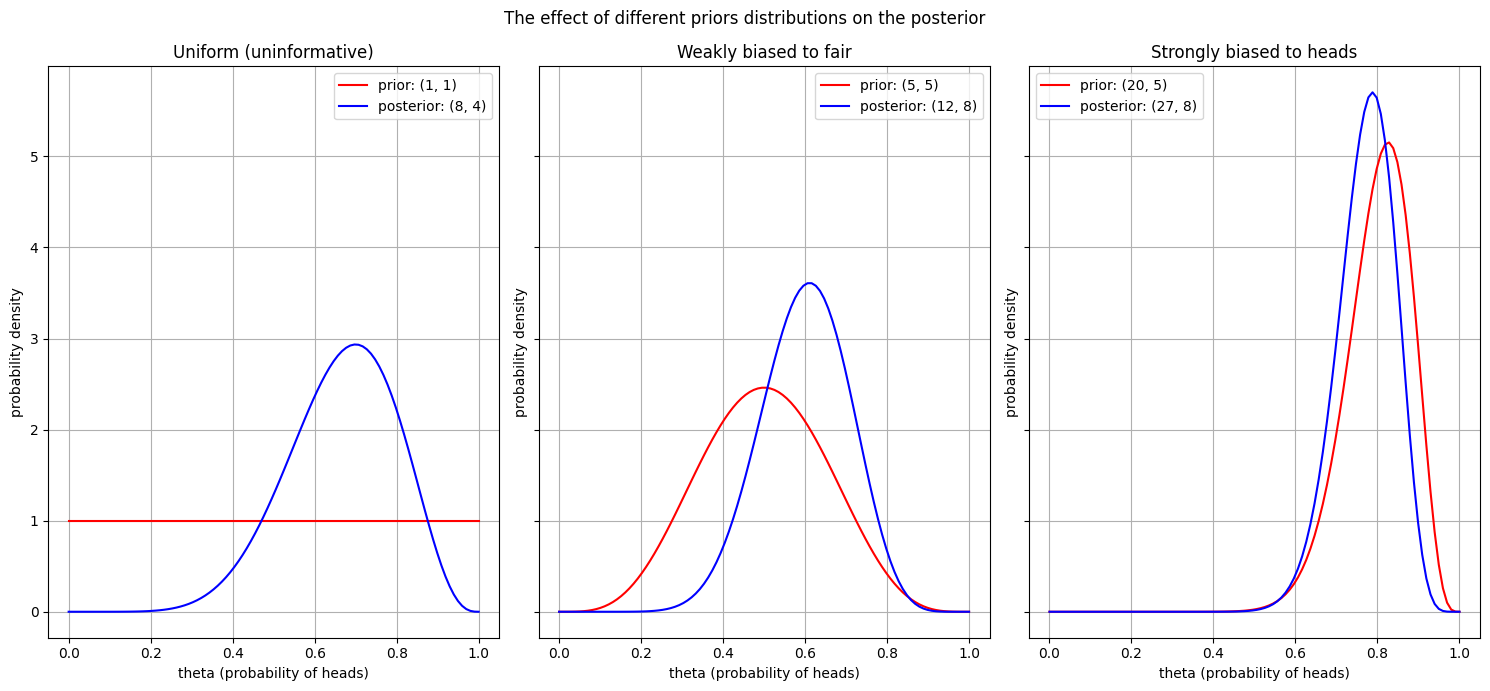

In [12]:
h, t = 7, 3 # 7 heads, 3 tails - initially
rng = np.random.default_rng(42)
x = np.linspace(0, 1, 100)
priors = {
    'Uniform (uninformative)': (1, 1),
    'Weakly biased to fair': (5, 5),
    'Strongly biased to heads': (20, 5),
}

fig, axes = plt.subplots(1, 3, figsize=(15, 7), sharey=True)
fig.suptitle("The effect of different priors distributions on the posterior")
for i, (title, params) in enumerate(priors.items()):   
    alpha_prior, beta_prior = params
    alpha_post = h + alpha_prior
    beta_post = t + beta_prior

    # prior distr
    axes[i].plot(x, beta.pdf(x, alpha_prior, beta_prior),label=f'prior: {alpha_prior, beta_prior}', color='red')    
    # posterior distr
    axes[i].plot(x, beta.pdf(x, alpha_post, beta_post), label=f'posterior: {alpha_post, beta_post}', color='blue')

    axes[i].set_title(title)    
    axes[i].set_xlabel('theta (probability of heads)')
    axes[i].set_ylabel('probability density')
    axes[i].grid(True)
    axes[i].legend()



plt.tight_layout()
plt.show()

The more confident we are in our initial hypothesis, the less the data can shift it.

## Understand the trade-off between the strength of prior knowledge and the amount of data

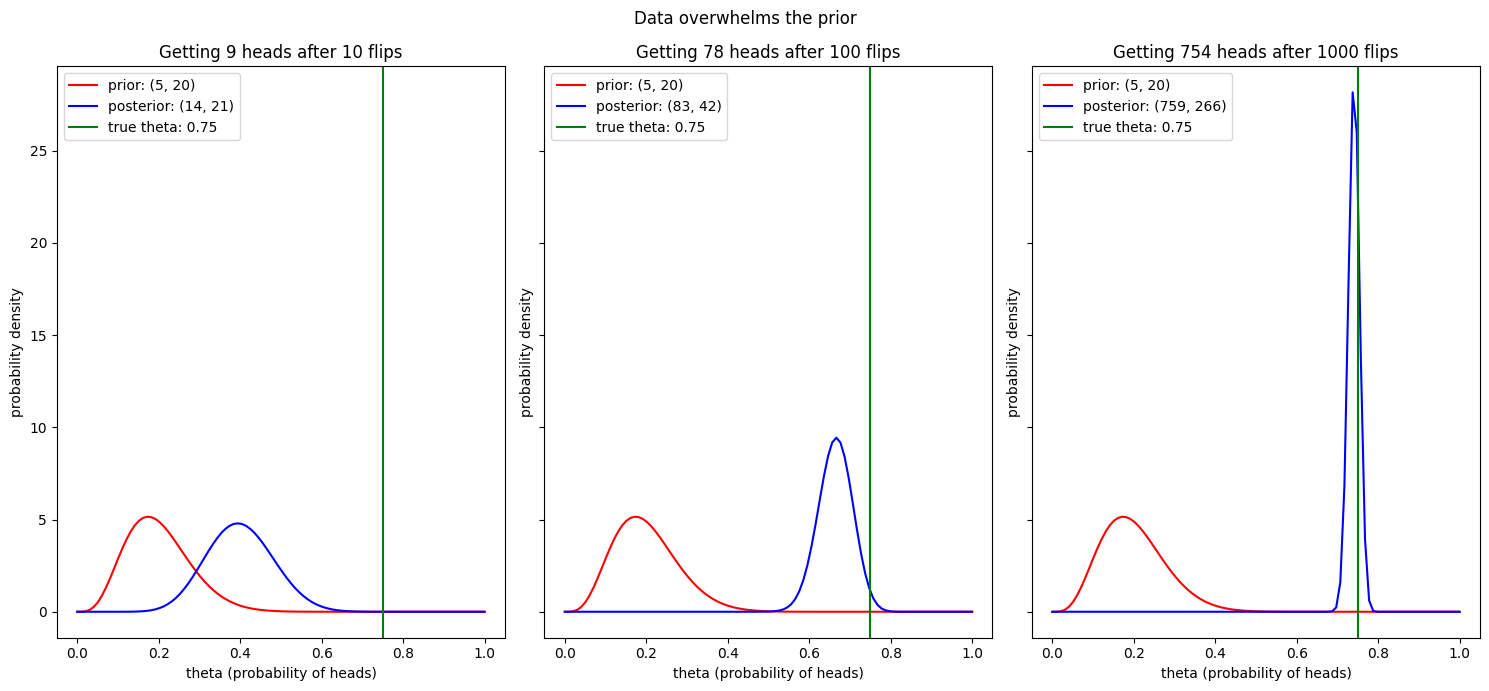

In [13]:
# let's setup incorrect but strong prior
alpha_prior, beta_prior = 5,20 
true_theta = 0.75 
data_sizes = [10, 100, 1000]
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 7))
fig.suptitle('Data overwhelms the prior')

for i, n in enumerate(data_sizes):
    h = np.random.binomial(n, true_theta) # this distr fits to coin flips
    t = n - h

    alpha_post = alpha_prior + h
    beta_post = beta_prior + t

    axes[i].plot(x, beta.pdf(x, alpha_prior, beta_prior), label=f'prior: {alpha_prior, beta_prior}', color='red')
    axes[i].plot(x, beta.pdf(x, alpha_post, beta_post), label=f'posterior: {alpha_post, beta_post}', color='blue')

    axes[i].axvline(true_theta, color='green', label=f'true theta: {true_theta}')

    axes[i].set_title(f"Getting {h} heads after {n} flips")
    axes[i].set_xlabel('theta (probability of heads)')
    axes[i].set_ylabel('probability density')
    axes[i].legend()


plt.tight_layout()
plt.show()    

After 1000 flips our incorrect prior becomes less significant

## Observe how Bayesian updating works on sequential data

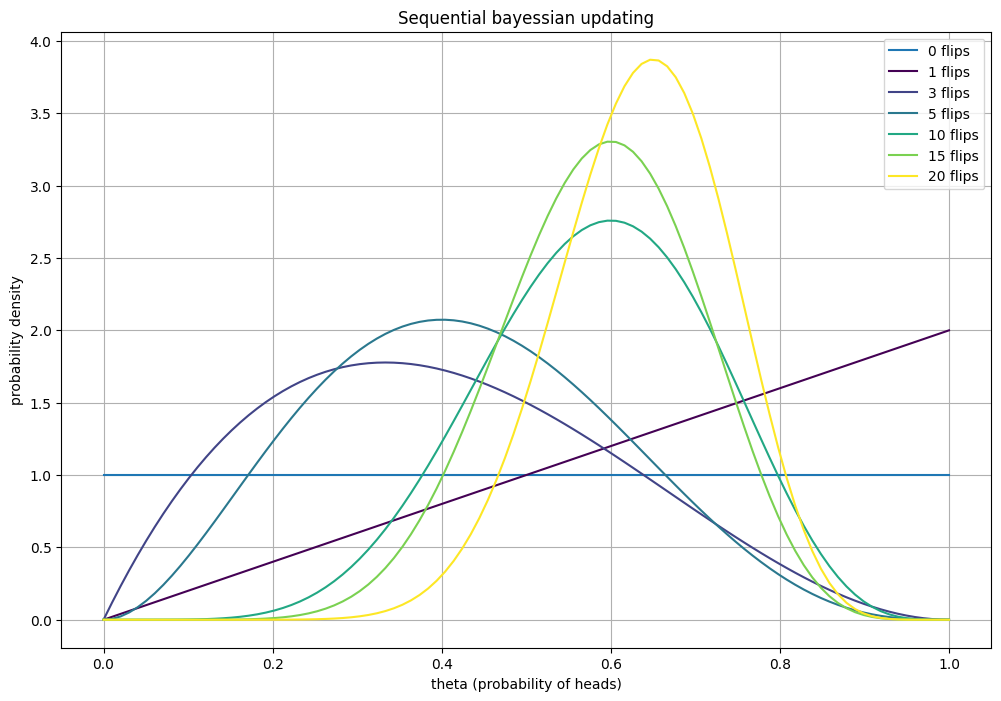

In [ ]:
#start with uniform prior
alpha_prior, beta_prior = 1, 1
true_theta = 0.7
flips_count = 20
sequence_of_flips = rng.binomial(1, true_theta, flips_count)


plot_indices = [0, 2, 4, 9, 14, 19] #on that indices we well check our current posteriors (new priors for next calculation)
colors = plt.cm.viridis(np.linspace(0, 1, len(plot_indices)))

plt.figure(figsize=(12, 8))
plt.title('Sequential bayessian updating')
plt.plot(x, beta.pdf(x, alpha_prior, beta_prior), label='0 flips')

for i, flip in enumerate(sequence_of_flips):
    alpha_prior += flip 
    beta_prior += (1 - flip)
    if i in plot_indices:
        color = colors[plot_indices.index(i)]
        plt.plot(x, beta.pdf(x, alpha_prior, beta_prior), label=f'{i+1} flips', color=color)


plt.ylabel('probability density')
plt.xlabel('theta (probability of heads)')
plt.legend()
plt.grid(True)
plt.show()

The prior knowledge converges to the true theta.